**IMPORT LIBRARIES**

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import spacy
from spacy import displacy
Text_Visualization = spacy.load('en_core_web_sm')
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**READ DATASET**

In [279]:
df= pd.read_csv('/content/demonetization-tweets.csv', encoding = "ISO-8859-1")
df

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14935,14936,14936,RT @saxenavishakha: Ghost of demonetization re...,False,0,NaN,2017-04-11 14:26:38,False,NaN,8.518037e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",MuzzammilAap,4,True,False
14936,14937,14937,N d modi fans-d true nationalists of the count...,False,0,NaN,2017-04-11 14:19:51,True,NaN,8.518020e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",JusteyAlex,0,False,False
14937,14938,14938,RT @bharat_builder: Lol. Demonetization has fi...,False,0,NaN,2017-04-11 14:19:14,False,NaN,8.518018e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",pavan_sethi,30,True,False
14938,14939,14939,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...,False,0,NaN,2017-04-11 14:13:14,False,NaN,8.518003e+17,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Stupidosaur,2,True,False


In [280]:
df.shape

(14940, 16)

In [281]:
df.columns

Index(['Unnamed: 0', 'X', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted'],
      dtype='object')

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     14940 non-null  int64  
 1   X              14940 non-null  int64  
 2   text           14940 non-null  object 
 3   favorited      14940 non-null  bool   
 4   favoriteCount  14940 non-null  int64  
 5   replyToSN      1102 non-null   object 
 6   created        14940 non-null  object 
 7   truncated      14940 non-null  bool   
 8   replyToSID     886 non-null    float64
 9   id             14940 non-null  float64
 10  replyToUID     1102 non-null   float64
 11  statusSource   14940 non-null  object 
 12  screenName     14940 non-null  object 
 13  retweetCount   14940 non-null  int64  
 14  isRetweet      14940 non-null  bool   
 15  retweeted      14940 non-null  bool   
dtypes: bool(4), float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [283]:
df.describe()

,Unnamed: 0,X,favoriteCount,replyToSID,id,replyToUID,retweetCount
count,14940.000000,14940.000000,14940.000000,8.860000e+02,1.494000e+04,1.102000e+03,14940.000000
mean,7470.500000,7470.500000,1.071486,8.383798e+17,8.255716e+17,4.302979e+16,223.770147
std,4312.950846,4312.950846,28.756361,3.880260e+16,2.610341e+16,1.796912e+17,411.793864
min,1.000000,1.000000,0.000000,2.209633e+10,8.010168e+17,1.917731e+06,0.000000
25%,3735.750000,3735.750000,0.000000,8.014600e+17,8.013058e+17,3.914920e+07,1.000000
50%,7470.500000,7470.500000,0.000000,8.528763e+17,8.014665e+17,1.457888e+08,40.000000
75%,11205.250000,11205.250000,0.000000,8.540342e+17,8.535175e+17,1.480227e+09,197.000000
max,14940.000000,14940.000000,3166.000000,8.554541e+17,8.554729e+17,8.542510e+17,5170.000000


In [284]:
df.isnull()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
1,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14935,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
14936,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
14937,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
14938,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False


**CHECK NULL VALUES**

In [285]:
df.isnull().sum()

Unnamed: 0           0
X                    0
text                 0
favorited            0
favoriteCount        0
replyToSN        13838
created              0
truncated            0
replyToSID       14054
id                   0
replyToUID       13838
statusSource         0
screenName           0
retweetCount         0
isRetweet            0
retweeted            0
dtype: int64

**GET COLUMNS WITH NULL VALUES**

In [286]:
cols_with_nan = df.columns[df.isna().any()].tolist()
print(cols_with_nan)

['replyToSN', 'replyToSID', 'replyToUID']


In [287]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14935    False
14936    False
14937    False
14938    False
14939    False
Length: 14940, dtype: bool

In [288]:
df.duplicated().sum()

0

**PLOT BIE AND BAR CHARTS FOR SOME IMPORTANT FEATURES**

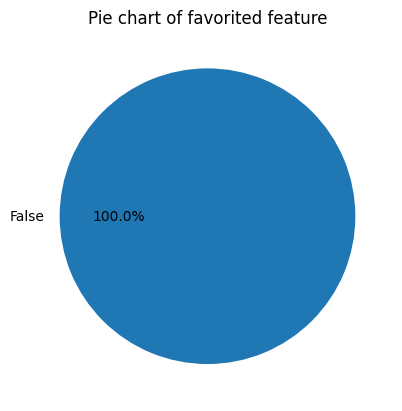

In [289]:
counts = df['favorited'].value_counts()
# Create a pie chart with the counts
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title(f"Pie chart of favorited feature")
# Show the pie chart
plt.show()

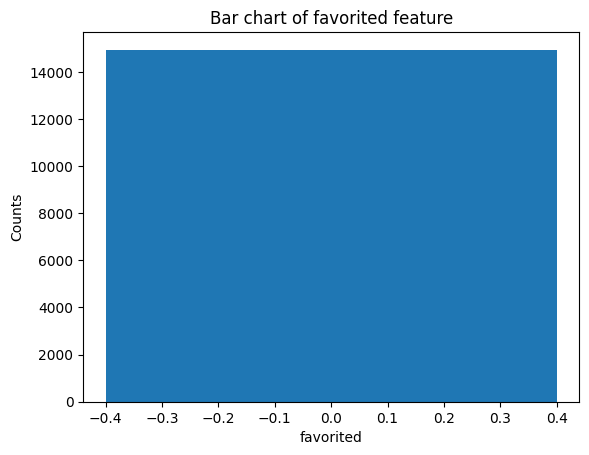

In [291]:
counts = df['favorited'].value_counts()
plt.bar(counts.index, counts)
plt.title(f"Bar chart of favorited feature")
plt.xlabel('favorited')
plt.ylabel("Counts")
# Show the bar chart
plt.show()

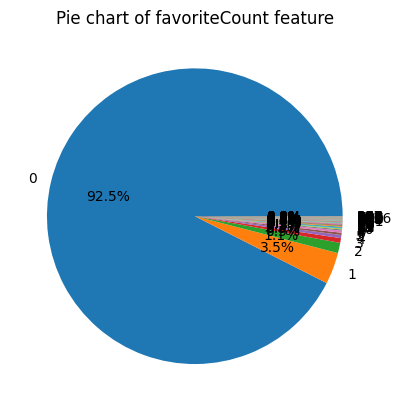

In [292]:
counts = df['favoriteCount'].value_counts()
# Create a pie chart with the counts
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title(f"Pie chart of favoriteCount feature")
# Show the pie chart
plt.show()

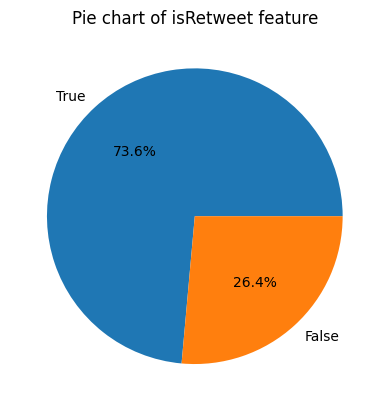

In [293]:
counts = df['isRetweet'].value_counts()
# Create a pie chart with the counts
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title(f"Pie chart of isRetweet feature")
# Show the pie chart
plt.show()

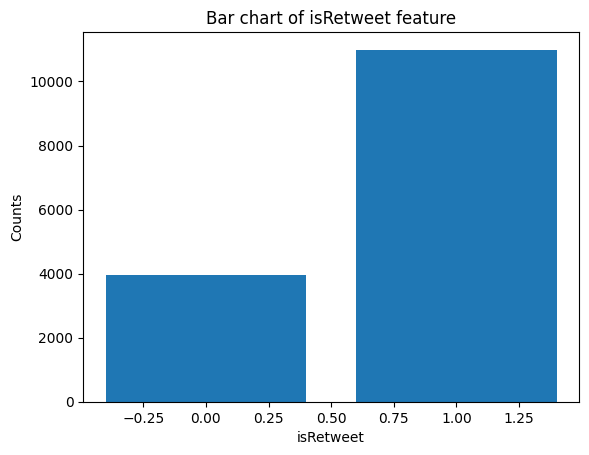

In [261]:
counts = df['isRetweet'].value_counts()
plt.bar(counts.index, counts)
plt.title(f"Bar chart of isRetweet feature")
plt.xlabel('isRetweet')
plt.ylabel("Counts")
# Show the bar chart
plt.show()

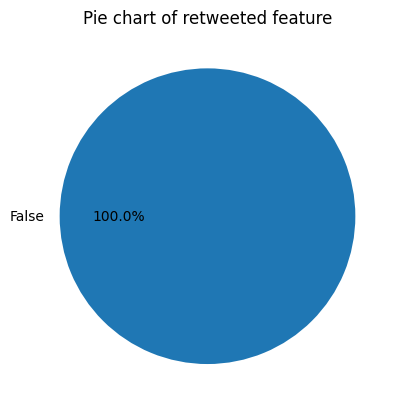

In [294]:
counts = df['retweeted'].value_counts()
# Create a pie chart with the counts
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title(f"Pie chart of retweeted feature")
# Show the pie chart
plt.show()

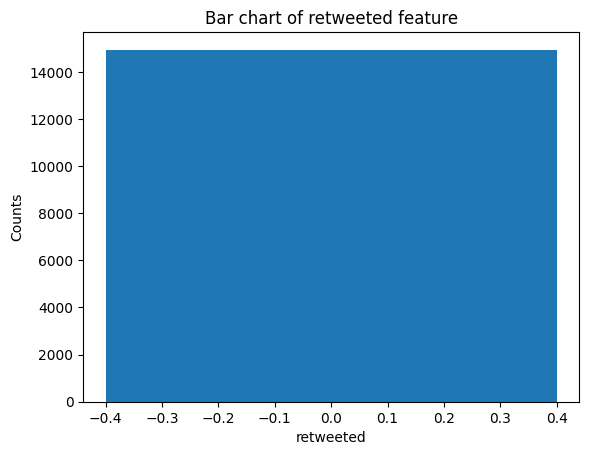

In [263]:
counts = df['retweeted'].value_counts()
plt.bar(counts.index, counts)
plt.title(f"Bar chart of retweeted feature")
plt.xlabel('retweeted')
plt.ylabel("Counts")
# Show the bar chart
plt.show()

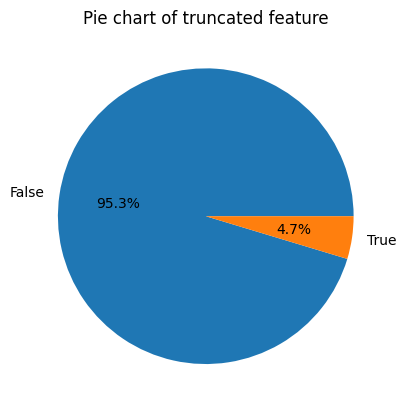

In [295]:
counts = df['truncated'].value_counts()
# Create a pie chart with the counts
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title(f"Pie chart of truncated feature")
# Show the pie chart
plt.show()

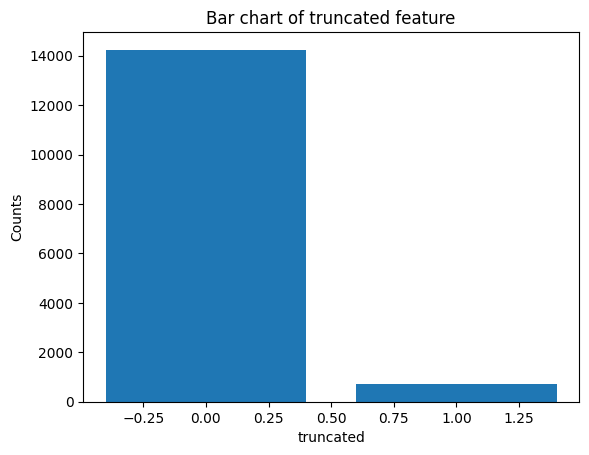

In [265]:
counts = df['truncated'].value_counts()
plt.bar(counts.index, counts)
plt.title(f"Bar chart of truncated feature")
plt.xlabel('truncated')
plt.ylabel("Counts")
# Show the bar chart
plt.show()

**KEEP ONLY TEXT COLUMN**

In [266]:
# Specify the column to keep
column_to_keep = 'text'

# Drop all columns except the specified column
df = df.drop(df.columns.difference([column_to_keep]), axis=1)
df

,text
0,RT @rssurjewala: Critical question: Was PayTM ...
1,RT @Hemant_80: Did you vote on #Demonetization...
2,"RT @roshankar: Former FinSec, RBI Dy Governor,..."
3,RT @ANI_news: Gurugram (Haryana): Post office ...
4,RT @satishacharya: Reddy Wedding! @mail_today ...
...,...
14935,RT @saxenavishakha: Ghost of demonetization re...
14936,N d modi fans-d true nationalists of the count...
14937,RT @bharat_builder: Lol. Demonetization has fi...
14938,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...


**REMOVE RETWEETED ABBRIVIATION AND PUT CLEANED TEXT IN NEW COLUMN CALLED clean_text**

In [267]:
def RT(text):
    return re.sub(r'RT', r' ', text)
df['clean_text'] = df['text'].apply(lambda x: RT(x))
df

,text,clean_text
0,RT @rssurjewala: Critical question: Was PayTM ...,@rssurjewala: Critical question: Was PayTM i...
1,RT @Hemant_80: Did you vote on #Demonetization...,@Hemant_80: Did you vote on #Demonetization ...
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...","@roshankar: Former FinSec, RBI Dy Governor, ..."
3,RT @ANI_news: Gurugram (Haryana): Post office ...,@ANI_news: Gurugram (Haryana): Post office e...
4,RT @satishacharya: Reddy Wedding! @mail_today ...,@satishacharya: Reddy Wedding! @mail_today c...
...,...,...
14935,RT @saxenavishakha: Ghost of demonetization re...,@saxenavishakha: Ghost of demonetization ret...
14936,N d modi fans-d true nationalists of the count...,N d modi fans-d true nationalists of the count...
14937,RT @bharat_builder: Lol. Demonetization has fi...,@bharat_builder: Lol. Demonetization has fix...
14938,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...,@Stupidosaur: @Vidyut B team of BJP. CIA bab...


**MAKE TWEETS ARE LOWER CASE**

In [268]:
df['clean_text'] = df['clean_text'].str.lower()
df

,text,clean_text
0,RT @rssurjewala: Critical question: Was PayTM ...,@rssurjewala: critical question: was paytm i...
1,RT @Hemant_80: Did you vote on #Demonetization...,@hemant_80: did you vote on #demonetization ...
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...","@roshankar: former finsec, rbi dy governor, ..."
3,RT @ANI_news: Gurugram (Haryana): Post office ...,@ani_news: gurugram (haryana): post office e...
4,RT @satishacharya: Reddy Wedding! @mail_today ...,@satishacharya: reddy wedding! @mail_today c...
...,...,...
14935,RT @saxenavishakha: Ghost of demonetization re...,@saxenavishakha: ghost of demonetization ret...
14936,N d modi fans-d true nationalists of the count...,n d modi fans-d true nationalists of the count...
14937,RT @bharat_builder: Lol. Demonetization has fi...,@bharat_builder: lol. demonetization has fix...
14938,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...,@stupidosaur: @vidyut b team of bjp. cia bab...


**REMOVE REPETING CHARACTERS**

In [269]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1\1+', r'\1\1', text)
df['clean_text'] = df['clean_text'].apply(lambda x: remove_repeating_char(x))
df

,text,clean_text
0,RT @rssurjewala: Critical question: Was PayTM ...,@rssurjewala: critical question: was paytm i...
1,RT @Hemant_80: Did you vote on #Demonetization...,@hemant_80: did you vote on #demonetization ...
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...","@roshankar: former finsec, rbi dy governor, ..."
3,RT @ANI_news: Gurugram (Haryana): Post office ...,@ani_news: gurugram (haryana): post office e...
4,RT @satishacharya: Reddy Wedding! @mail_today ...,@satishacharya: reddy wedding! @mail_today c...
...,...,...
14935,RT @saxenavishakha: Ghost of demonetization re...,@saxenavishakha: ghost of demonetization ret...
14936,N d modi fans-d true nationalists of the count...,n d modi fans-d true nationalists of the count...
14937,RT @bharat_builder: Lol. Demonetization has fi...,@bharat_builder: lol. demonetization has fix...
14938,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...,@stupidosaur: @vidyut b team of bjp. cia bab...


**REMOVE MENTIONS**

In [270]:
def remove_mentions(text):
    return re.sub(r'@[A-Za-z0-9_]+', r' ', text)
df['clean_text'] = df['clean_text'].apply(lambda x: remove_mentions(x))
df

,text,clean_text
0,RT @rssurjewala: Critical question: Was PayTM ...,: critical question: was paytm informed abo...
1,RT @Hemant_80: Did you vote on #Demonetization...,: did you vote on #demonetization on modi s...
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",": former finsec, rbi dy governor, cbdt chai..."
3,RT @ANI_news: Gurugram (Haryana): Post office ...,: gurugram (haryana): post office employees...
4,RT @satishacharya: Reddy Wedding! @mail_today ...,: reddy wedding! cartoon #demonetization ...
...,...,...
14935,RT @saxenavishakha: Ghost of demonetization re...,: ghost of demonetization returns with repo...
14936,N d modi fans-d true nationalists of the count...,n d modi fans-d true nationalists of the count...
14937,RT @bharat_builder: Lol. Demonetization has fi...,": lol. demonetization has fixed a lot, like..."
14938,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...,": b team of bjp. cia baby. cctv, evm but ..."


**REMOVE HASHTAGS**

In [271]:
def remove_hashtag(text):
    return re.sub(r'#[A-Za-z0-9_]+', r' ', text)
df['clean_text'] = df['clean_text'].apply(lambda x: remove_hashtag(x))
df

,text,clean_text
0,RT @rssurjewala: Critical question: Was PayTM ...,: critical question: was paytm informed abo...
1,RT @Hemant_80: Did you vote on #Demonetization...,: did you vote on on modi survey app?
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",": former finsec, rbi dy governor, cbdt chai..."
3,RT @ANI_news: Gurugram (Haryana): Post office ...,: gurugram (haryana): post office employees...
4,RT @satishacharya: Reddy Wedding! @mail_today ...,: reddy wedding! cartoon https://t.co...
...,...,...
14935,RT @saxenavishakha: Ghost of demonetization re...,: ghost of demonetization returns with repo...
14936,N d modi fans-d true nationalists of the count...,n d modi fans-d true nationalists of the count...
14937,RT @bharat_builder: Lol. Demonetization has fi...,": lol. demonetization has fixed a lot, like..."
14938,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...,": b team of bjp. cia baby. cctv, evm but ..."


**REMOVE LINKS**

In [272]:
def remove_links(text):
    return re.sub(r'http\S+|www.\S+|<.*?>', r' ', text)
df['clean_text'] = df['clean_text'].apply(lambda x: remove_links(x))
df

,text,clean_text
0,RT @rssurjewala: Critical question: Was PayTM ...,: critical question: was paytm informed abo...
1,RT @Hemant_80: Did you vote on #Demonetization...,: did you vote on on modi survey app?
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",": former finsec, rbi dy governor, cbdt chai..."
3,RT @ANI_news: Gurugram (Haryana): Post office ...,: gurugram (haryana): post office employees...
4,RT @satishacharya: Reddy Wedding! @mail_today ...,: reddy wedding! cartoon
...,...,...
14935,RT @saxenavishakha: Ghost of demonetization re...,: ghost of demonetization returns with repo...
14936,N d modi fans-d true nationalists of the count...,n d modi fans-d true nationalists of the count...
14937,RT @bharat_builder: Lol. Demonetization has fi...,": lol. demonetization has fixed a lot, like..."
14938,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...,": b team of bjp. cia baby. cctv, evm but ..."


**REMOVE PANCTUATIONS**

In [273]:
def remove_punctuation(punc):
    for char in string.punctuation:
        punc = punc.replace(char, ' ')
    return punc
df['clean_text'] = df['clean_text'].apply(remove_punctuation)
df

,text,clean_text
0,RT @rssurjewala: Critical question: Was PayTM ...,critical question was paytm informed abo...
1,RT @Hemant_80: Did you vote on #Demonetization...,did you vote on on modi survey app
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",former finsec rbi dy governor cbdt chai...
3,RT @ANI_news: Gurugram (Haryana): Post office ...,gurugram haryana post office employees...
4,RT @satishacharya: Reddy Wedding! @mail_today ...,reddy wedding cartoon
...,...,...
14935,RT @saxenavishakha: Ghost of demonetization re...,ghost of demonetization returns with repo...
14936,N d modi fans-d true nationalists of the count...,n d modi fans d true nationalists of the count...
14937,RT @bharat_builder: Lol. Demonetization has fi...,lol demonetization has fixed a lot like...
14938,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...,b team of bjp cia baby cctv evm but ...


**USE VADER SENTIMENT ANALYSIS FOR CLASSIFICATION AS WE HAVEN'T LABELS/CLASSES**

In [274]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Assuming you have a DataFrame named 'df' with a column named 'text'

# Calculate sentiment scores for each text
df['sentiment_scores'] = df['text'].apply(lambda x: sid.polarity_scores(x))

# Categorize sentiment based on compound scores
df['sentiment_category'] = df['sentiment_scores'].apply(
    lambda scores: 'Positive' if scores['compound'] > 0
    else 'Negative' if scores['compound'] < 0
    else 'Neutral'
)

df

,text,clean_text,sentiment_scores,sentiment_category
0,RT @rssurjewala: Critical question: Was PayTM ...,critical question was paytm informed abo...,"{'neg': 0.1, 'neu': 0.783, 'pos': 0.117, 'comp...",Positive
1,RT @Hemant_80: Did you vote on #Demonetization...,did you vote on on modi survey app,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",former finsec rbi dy governor cbdt chai...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,RT @ANI_news: Gurugram (Haryana): Post office ...,gurugram haryana post office employees...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
4,RT @satishacharya: Reddy Wedding! @mail_today ...,reddy wedding cartoon,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
...,...,...,...,...
14935,RT @saxenavishakha: Ghost of demonetization re...,ghost of demonetization returns with repo...,"{'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'comp...",Negative
14936,N d modi fans-d true nationalists of the count...,n d modi fans d true nationalists of the count...,"{'neg': 0.22, 'neu': 0.664, 'pos': 0.116, 'com...",Negative
14937,RT @bharat_builder: Lol. Demonetization has fi...,lol demonetization has fixed a lot like...,"{'neg': 0.156, 'neu': 0.496, 'pos': 0.347, 'co...",Positive
14938,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...,b team of bjp cia baby cctv evm but ...,"{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...",Positive


**`BAR CHART FOR CLASSES`**

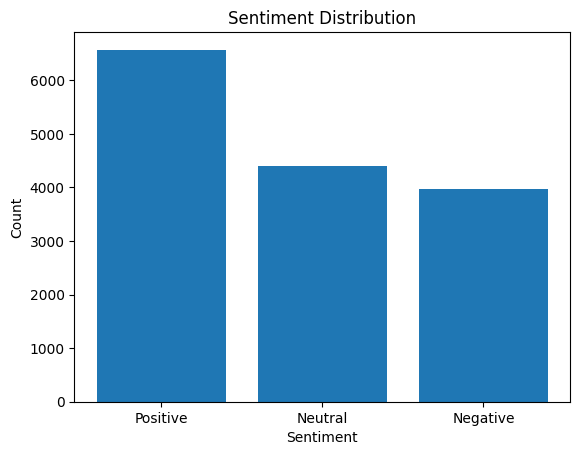

In [275]:
# Count the occurrences of each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Extract the sentiment categories and their corresponding counts
categories = sentiment_counts.index.tolist()
counts = sentiment_counts.tolist()

# Create a bar plot
plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

# Display the plot
plt.show()

**`PIE CHART FOR CLASSES`**

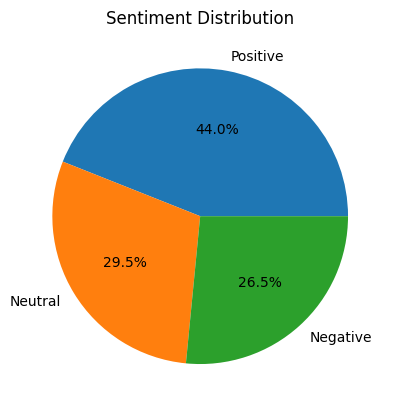

In [276]:
# Count the occurrences of each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index.tolist(), autopct='%1.1f%%')

# Add title
plt.title('Sentiment Distribution')

# Display the plot
plt.show()